## 1. Import Necessary Libraries

In [439]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp, ttest_ind

## 2. Read the data as dataframe

In [440]:
insdata = pd.read_csv('insurance.csv')
insdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Perform Basic EDA

### a. Shape of data

In [441]:
insdata.shape

(1338, 7)

### b. Data type of each attribute


In [442]:
insdata.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### c. Checking missing values

In [443]:
insdata.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### d. 5 point summary

In [444]:
insdata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
#insdata.describe(include= 'all')

### e. Distribution of 'bmi', age and charges columns

#### Plotting individual distribution charts for BMI, Age and Charges columns

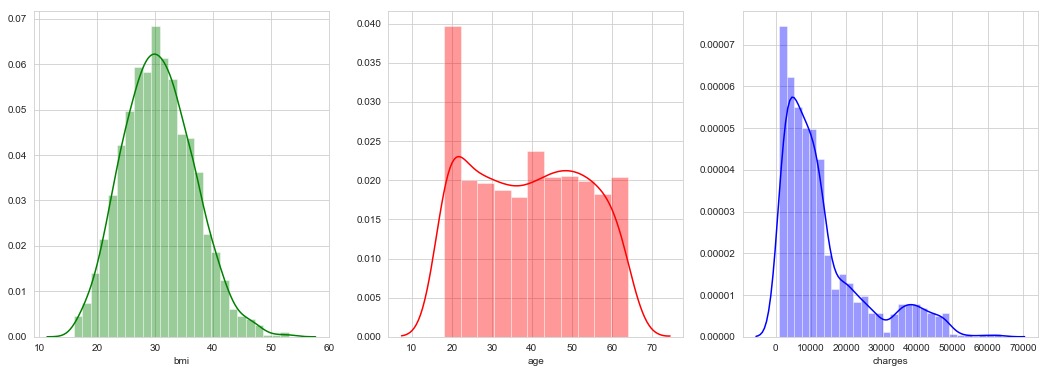

In [445]:
f, axes = plt.subplots(1,3,figsize=(18,6))
sns.distplot(insdata['bmi'], color = 'g', ax = axes[0])
sns.distplot(insdata['age'], color = 'r', ax = axes[1])
sns.distplot(insdata['charges'], color = 'b', ax = axes[2])

###### <font color='green'> BMI : Normal distribution</font>
###### <font color='red'> Age : Uniform </font>
###### <font color='blue'> Charges : Right skewed </font>

In [227]:
# Use pairplot for continuous variables
# Pairplot plots frequency distribution (histogram) & scatter plots
# sns.pairplot(insdata, vars = ('bmi','age' ,'charges'))

### f. Measure skewness of bmi, age and charges

### Bulmer rule of thumb
###### If skewness is between −½ and +½, the distribution is approximately symmetric.
###### If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
###### If skewness is less than −1 or greater than +1, the distribution is highly skewed.

In [446]:
insdata.skew(axis = 0, skipna = True) 

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

###### Age and BMI  : Approximately symmetric as value between −½ and +½ 
#### Children     : Moderately skewed as value between +½ and +1
### Charges      : Highly skewed as value greater than +1 (RIGHT SKEWED)

## g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

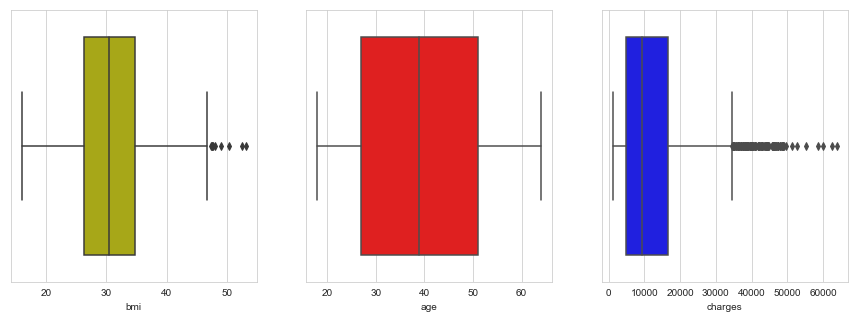

In [447]:
# Boxplot for dataframe
# Code1
# sns.boxplot(data=insdata3.iloc[:,0:5])

# Code2
# sns.catplot(x="sex", y="charges", hue="smoker",
#             kind="box", data=insdata, palette = 'magma')

# Code3
# Boxplot for columns of dataframe
f, axes = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(insdata['bmi'], color = 'y', ax = axes[0])
sns.boxplot(insdata['age'], color = 'r', ax = axes[1])
sns.boxplot(insdata['charges'], color = 'b', ax = axes[2])

### BMI and Charges : Outliers are present
### Age                       :  No Outliers

## h. Distribution of categorical columns (including children)

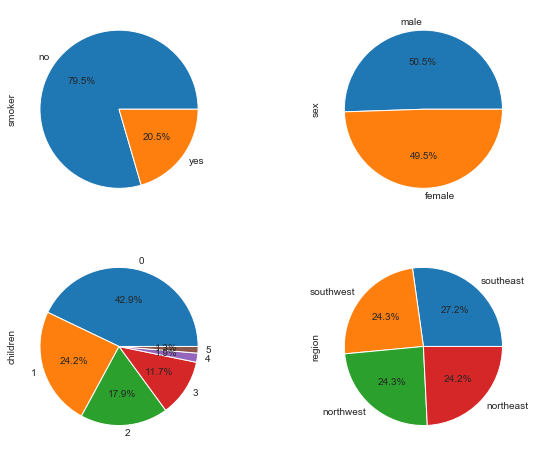

In [448]:
f, axes = plt.subplots(2,2,figsize=(10,8))
insdata.smoker.value_counts().plot(kind='pie', autopct='%1.1f%%', label = "smoker" , ax = axes[0][0])
insdata.sex.value_counts().plot(kind='pie', autopct='%1.1f%%', label = "sex" , ax = axes[0][1])
insdata.children.value_counts().plot(kind='pie', autopct='%1.1f%%', label = "children" , ax = axes[1][0])
insdata.region.value_counts().plot(kind='pie', autopct='%1.1f%%', label = "region" , ax = axes[1][1])
plt.show()

### Convert categorical data to numerical data

In [449]:
X = insdata.copy()
X.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [450]:
# Convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le = {}
for i in range(0,X.shape[1]):
    if X.dtypes[i]=='object':
        le[i] = LabelEncoder()
        X[X.columns[i]] = le[i].fit_transform(X[X.columns[i]])

In [451]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Find correlation between variables and  Display heatmap

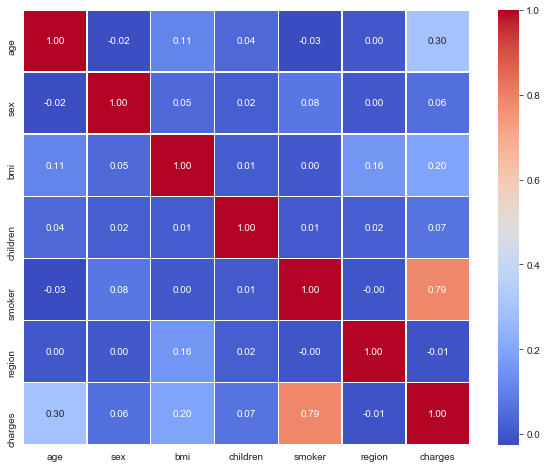

In [452]:
corr = X.corr()
# Plot figsize
fig, axes = plt.subplots(figsize=(10, 8))
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(data=X.corr(), cmap='coolwarm', annot=True, fmt = ".2f", linewidths=.5, ax=axes) 
# Parameters:
# data : 2D data for the heatmap.
# annot : If True, write the data value in each cell.
# linewidths : Width of the lines that will divide each cell.
# ax : Axes in which to draw the plot, otherwise use the currently-active Axes.
# Apply xticks
# plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
# plt.yticks(range(len(corr.columns)), corr.columns)
# Show plot 
plt.show()

Correlation is a number that indicates how the two attributes are related to each other. As this number approaches 1.0, the relationship is strengthened in the right direction. As it approaches -1.0, it is strengthened in the opposite direction. If this value is close to zero, the bond between the two data is weak. For example in the above matrix, we see a little (but no more) bound with person's age and charge values. Other bounds are so weak. Now we visualize this correlation matrix with Heatmap

#### Sex has very less correlation with other variables.

In [453]:
le

{1: LabelEncoder(), 4: LabelEncoder(), 5: LabelEncoder()}

In [454]:
X[X.columns[1]] = le[1].inverse_transform(X[X.columns[1]])

In [455]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,3,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,1,21984.47061
4,32,male,28.880,0,0,1,3866.85520


## i. Pair plot that includes all column of data frame

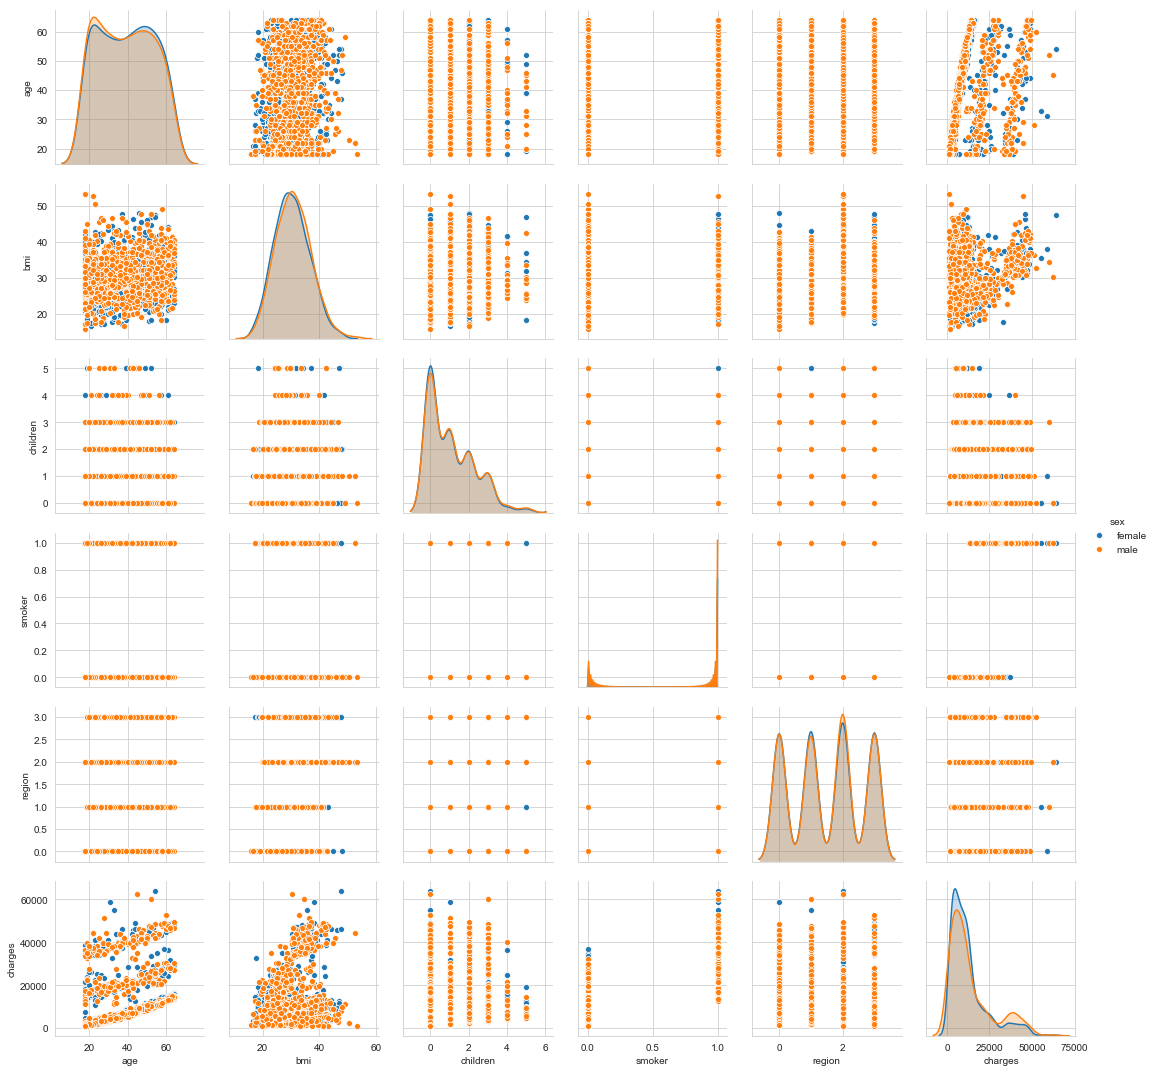

In [456]:
g = sns.pairplot(X,  hue="sex")

## 4 . Answer the question with statistical evidence

### a. Charge V/s Smokers

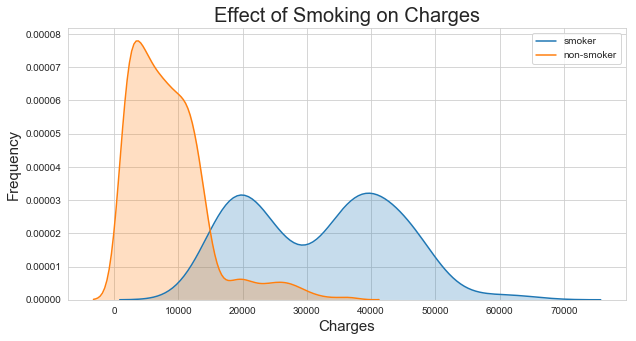

In [457]:
# Add  density curves for the charges distribution, one for smokers and one for non-smokers
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(insdata.charges[insdata.smoker =='yes'], ax = ax, label='smoker', shade=True)
sns.kdeplot(insdata.charges[insdata.smoker =='no'], ax = ax, label='non-smoker', shade=True)
ax.set_ylabel("Frequency", fontsize=15)
ax.set_xlabel('Charges', fontsize=15)
ax.set_title("Effect of Smoking on Charges", fontsize=20)
plt.show()

### The distribution shows that Smoking has significant effect on Charges.  Let's verify this using statistical analysis

In [265]:
# Null hypothosis: H0 = Smoking does not affect insurance Charges
# Alternate hypothesis: Ha = Smoking affect insurance Charges

In [458]:
smokers = np.array(insdata.charges[insdata.smoker =='yes'])
nonsmokers = np.array(insdata.charges[insdata.smoker =='no'])

In [459]:
from scipy.stats  import ttest_1samp,ttest_ind
t_statistic, pval  =  stats.ttest_ind(smokers,nonsmokers)
print("pvalue is",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

pvalue is 8.271435842177219e-283
 we are rejecting null hypothesis


#### Charges of people who smoke differs significantly from the people who don't smoke

### b. Bmi V/s Gender

In [460]:
bmi_male = np.array(insdata.bmi[insdata.sex =='male'])
bmi_female = np.array(insdata.bmi[insdata.sex =='female'])

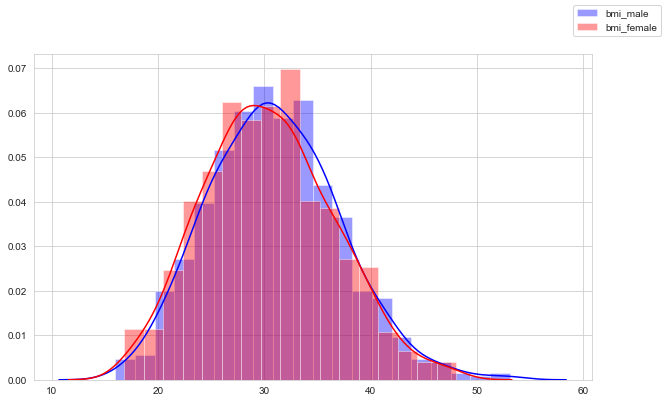

In [461]:
fig = plt.figure(figsize = (10,6))
sns.distplot(bmi_male, color = 'b', label = "bmi_male")
sns.distplot(bmi_female, color = 'r' , label = "bmi_female")
fig.legend()

###  The distribution between BMI of Male and Female does not differ significantly. Let's verify this using statistical analysis

In [ ]:
#Null Hypothesis: H0 = Bmi of Males do not differ significantly from that of Females
#Alternate Hypothesis: Ha = Bmi of Males differs significantly from that of Females

In [462]:
# Use 2 sided T test for independent samples
from scipy.stats  import ttest_1samp,ttest_ind
t_statistic, pval  =  stats.ttest_ind(bmi_male,bmi_female)
print("pvalue is",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

pvalue is 0.08997637178984932
we are accepting null hypothesis


### BMI of Males does not differ significantly with that of BMI of Females

## c. Check whether proportion of smokers significantly different in different genders

Text(0.5, 1.0, 'Count of  smokers and non-smokers')

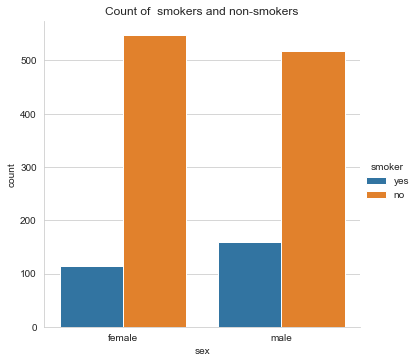

In [463]:
sns.catplot(x="sex", kind="count",hue = 'smoker', data=insdata)
plt.title("Count of  smokers and non-smokers")

### Difference in proportion Not very clear from Count plot. Let's verify this using statistical analysis¶

In [464]:
# Contingency Table
contingency_table=pd.crosstab(insdata["sex"],insdata["smoker"], margins = True)
contingency_table

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


In [465]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values])
f_obs

array([[547, 115],
       [517, 159]], dtype=int64)

In [466]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(7.39291081459996, 0.006548143503580696, 1)

###  The X2 = ~ 7, p-value = ~ 0 and degrees of freedom = 1.
### With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'Gender' and the 'Smoker' column.

## d. Check the distribution of BMI across women with different no of children

In [467]:
mask = ((insdata.sex == "female") & (insdata.children <= 2))
bmi_women = insdata[mask][['sex','bmi', 'children']]
bmi_women.shape

(566, 3)

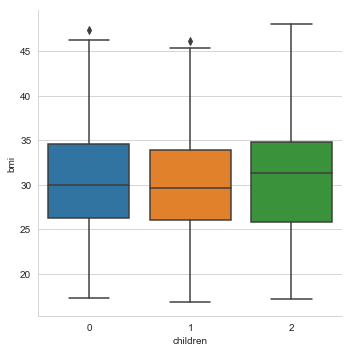

In [468]:
sns.catplot(x="children", y="bmi", 
            kind="box", dodge=False, data=bmi_women);

### BMI distribution for women with 0,1,2 children are same.Let's verify this using statistical analysis

In [469]:
#Group into 3 groups, 0,1,2 children
Child0 = np.array(bmi_women.bmi[bmi_women.children ==0])
Child1 = np.array(bmi_women.bmi[bmi_women.children ==1])
Child2 = np.array(bmi_women.bmi[bmi_women.children ==2])

In [ ]:
#Use One Way ANOVA for 3 sample groups 
#Null Hypothesis: H0: mean(Child0) = mean(Child1) = mean(Child2)
#Alternate Hypothesis: Ha: One of the means would differ
# ANOVA uses F-tests to statistically test the equality of means.

In [470]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'bmi ~ children'
model = ols(formula, bmi_women).fit()
aov_table = sm.stats.anova_lm(model)
print(aov_table)

             df        sum_sq    mean_sq         F   PR(>F)
children    1.0      2.512982   2.512982  0.068411  0.79376
Residual  564.0  20717.738725  36.733579       NaN      NaN


##### Here p_value is 0.79376 > 0.05 hence we Fail to Reject Null Hypothesis
##### Distribution of BMI for women with 0,1,2 children is same

In [471]:
pwd

'D:\\testlab'